In [1]:
from sympy import symbols, solve, cos
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point, Particle
from sympy.physics.mechanics import RigidBody, inertia, KanesMethod, init_vprinting, Lagrangian, LagrangesMethod

In [2]:
init_vprinting()

In [3]:
x1, x2 = dynamicsymbols('x1, x2')
v1, v2 = dynamicsymbols('v1, v2')
m1, m2, k, g = symbols('m1, m2, k, g')

In [4]:
N = ReferenceFrame('N')

In [5]:
O = Point('O')
P1 = O.locatenew('P1', x1 * N.x)
P2 = O.locatenew('P2', x2 * N.x)

In [6]:
O.set_vel(N, 0)
P1.set_vel(N, v1 * N.x)
P2.set_vel(N, v2 * N.x)

In [7]:
block1 = Particle('block1', P1, m1)
block2 = Particle('block2', P2, m2)

# Kane's Method

In [8]:
force1 = (P1, m1 * g * N.x - k * x1 * N.x + k * (x2 - x1) * N.x)
force2 = (P2, m2 * g * N.x - k * (x2 - x1) * N.x)

In [9]:
kane = KanesMethod(N, (x1, x2), (v1, v2), kd_eqs=(x1.diff() - v1, x2.diff() - v2))
fr, frstar = kane.kanes_equations((force1, force2), (block1, block2))

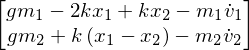

In [10]:
fr_plus_frstar = fr + frstar
fr_plus_frstar.simplify()
fr_plus_frstar

This gives the two equilibrium points:

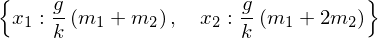

In [11]:
eq_points = solve(fr_plus_frstar.subs({v1.diff(): 0, v2.diff(): 0, v1: 0, v2: 0}), x1, x2)
eq_points

# Lagrange's Method

In [12]:
P1.set_vel(N, x1.diff() * N.x)
P2.set_vel(N, x2.diff() * N.x)

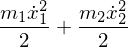

In [13]:
block1.kinetic_energy(N) + block2.kinetic_energy(N)

In [14]:
block1.potential_energy = k * x1**2 / 2 + k * (x2 - x1)**2 / 2 - m1 * g * x1 
block2.potential_energy = -m2 * g * x2

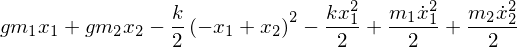

In [15]:
L = Lagrangian(N, block1, block2)
L

In [16]:
lagrange = LagrangesMethod(L, (x1, x2))

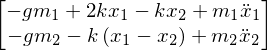

In [17]:
lagranges_equations = lagrange.form_lagranges_equations()
lagranges_equations.simplify()
lagranges_equations

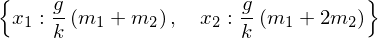

In [18]:
eq_points = solve(lagranges_equations.subs({x1.diff().diff(): 0,
                                            x2.diff().diff(): 0,
                                            x1.diff(): 0, x2.diff(): 0}), x1, x2)
eq_points

# Compare

In [19]:
should_be_zero = fr_plus_frstar.subs({v1: x1.diff(), v2: x2.diff()}) + lagranges_equations
should_be_zero.simplify()
should_be_zero